### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
data=pd.read_csv("Data.csv")

In [4]:
item=pd.read_csv("item.csv")

In [5]:
user=pd.read_csv("user.csv")

In [6]:
data ##check if it is read correctly

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [7]:
item ##check if it is read correctly

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
user ##check if it is read correctly

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [9]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [10]:
data.shape


(100000, 4)

In [11]:
data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [12]:
data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [55]:
item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   unknown       1680 non-null   int64 
 4   Action        1680 non-null   int64 
 5   Adventure     1680 non-null   int64 
 6   Animation     1680 non-null   int64 
 7   Childrens     1680 non-null   int64 
 8   Comedy        1680 non-null   int64 
 9   Crime         1680 non-null   int64 
 10  Documentary   1680 non-null   int64 
 11  Drama         1680 non-null   int64 
 12  Fantasy       1680 non-null   int64 
 13  Film-Noir     1680 non-null   int64 
 14  Horror        1680 non-null   int64 
 15  Musical       1680 non-null   int64 
 16  Mystery       1680 non-null   int64 
 17  Romance       1680 non-null   int64 
 18  Sci-Fi        1680 non-null   int64 
 19  Thrill

In [13]:
item.shape

(1681, 22)

In [14]:
item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [56]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [57]:
user.shape

(943, 5)

In [58]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [61]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [62]:
item
# use sum on the default axis
item.iloc[:,3:22].sum(axis=0)

unknown          0
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [20]:
#hint: use sum on the axis = 1
item[item.iloc[:,4:22].sum(axis=1)>1] # original rows

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [21]:
MovieSelection=item[['movie id','movie title']]

In [22]:
MovieSelection['CountGenres']=item.iloc[:,4:22].sum(axis=1)

In [23]:
MovieSelection #Show all movies with the count

,movie id,movie title,CountGenres
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3
...,...,...,...
1676,1678,Mat' i syn,1
1677,1679,B. Monkey,2
1678,1680,Sliding Doors,2
1679,1681,You So Crazy,1


In [24]:
MovieSelection[MovieSelection['CountGenres']>1]#Only show movies with count>1

,movie id,movie title,CountGenres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1667,1669,MURDER and murder,3
1668,1670,Tainted,2
1671,1673,Mirage,2
1677,1679,B. Monkey,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [25]:
item[item['unknown']==1] #check which row has an unknown genre

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
item=item[item['unknown']!=1] #Now only select the rows that are not unknown. 
#This should have one row less than the total number of rows.

In [27]:
item #the result is 1680 which is one row less than the total.

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [28]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [29]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


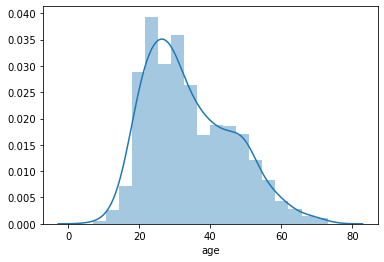

In [30]:
#Distplot of age
sns.distplot(user['age'])

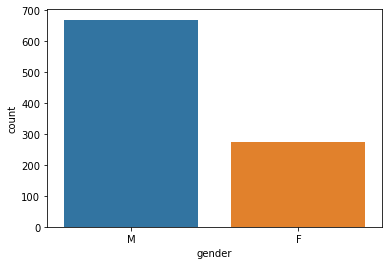

In [31]:
sns.countplot(user['gender'])

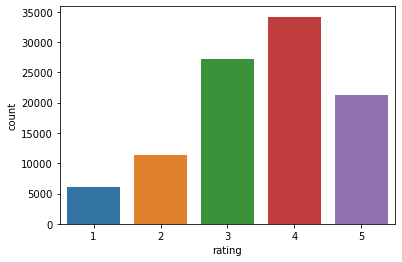

In [32]:
sns.countplot(data['rating'])

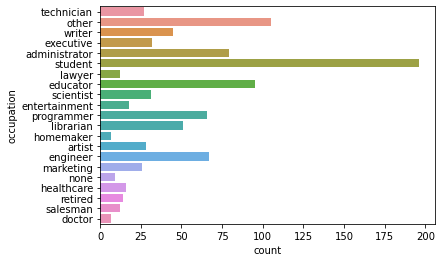

In [33]:
sns.countplot(y='occupation',data=user)

In [34]:
Year=item['release date'].str.split("-", n=2, expand=True)

In [35]:
Year[2]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: 2, Length: 1680, dtype: object

In [36]:
Year=Year[2]

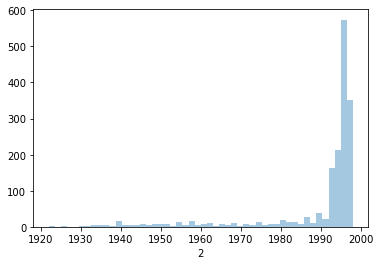

In [37]:
sns.distplot(Year, kde=False)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [38]:
#Your answer here
itemCopy=item.copy()

In [39]:
itemCopy['ReleaseYear']=Year
#itemCopy

In [40]:
popularity=itemCopy.groupby('ReleaseYear').sum()
popularity=popularity.drop(columns='movie id').transpose()

In [41]:
popularity

ReleaseYear,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


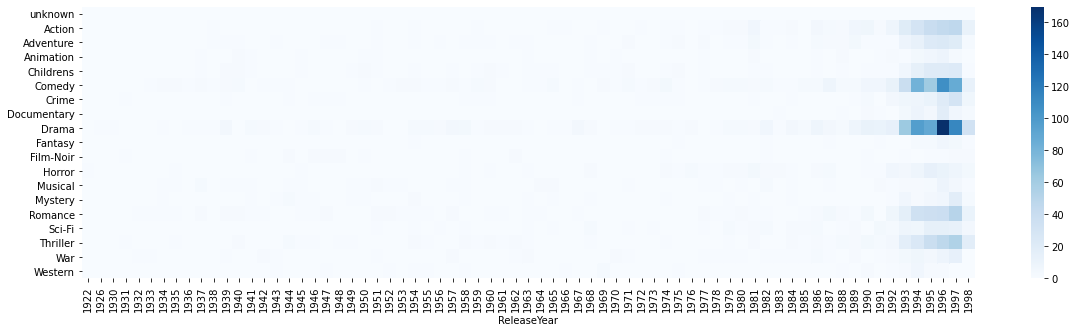

In [64]:
plt.figure(figsize=(20,5))
sns.heatmap(popularity,cmap="Blues")
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [43]:
#your answer here
  ##calculate number of ratings per movie

TotalNumberOfRatings=data.groupby('movie id')['rating'].count()
data2=pd.merge(data,TotalNumberOfRatings, how='inner', on='movie id')

In [44]:
Movie100=data2[data2['rating_y']>100] #select all rows where the number of ratings is > 100

In [45]:
Average=Movie100.groupby('movie id')['rating_x'].mean() #calculate the mean per movie id

In [65]:
FinalDataSet=pd.merge(Average,item[['movie id','movie title']], how='left', on='movie id').sort_values(by=['rating_x'], ascending=False).head(25)
FinalDataSet[['movie id','movie title','rating_x']]

,movie id,movie title,rating_x
231,408,"Close Shave, A",4.491071
202,318,Schindler's List,4.466443
91,169,"Wrong Trousers, The",4.466102
261,483,Casablanca,4.456790
29,64,"Shawshank Redemption, The",4.445230
292,603,Rear Window,4.387560
7,12,"Usual Suspects, The",4.385768
22,50,Star Wars,4.358491
99,178,12 Angry Men,4.344000
72,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [47]:
MergedData=pd.merge(data,user, how='inner', on='user id')
MergedData=pd.merge(MergedData,item,how='left',on='movie id')

In [48]:
MergedData

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,196,393,4,881251863,49,M,writer,55105,Mrs. Doubtfire,01-Jan-1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196,381,4,881251728,49,M,writer,55105,Muriel's Wedding,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,196,251,3,881251274,49,M,writer,55105,Shall We Dance?,11-Jul-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,196,655,5,881251793,49,M,writer,55105,Stand by Me,01-Jan-1986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,941,919,5,875048887,20,M,student,97229,"City of Lost Children, The",01-Jan-1995,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99996,941,273,3,875049038,20,M,student,97229,Heat,01-Jan-1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,941,1,5,875049144,20,M,student,97229,Toy Story,01-Jan-1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,941,294,4,875048532,20,M,student,97229,Liar Liar,21-Mar-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
TotalNumberOfRatingsPerGenre=MergedData.groupby('gender').sum().loc['Action':'Western']
TotalNumberOfRatingsPerGenre



,user id,movie id,rating,timestamp,age,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,,,
F,12226134,11453179,90901,22750324303258,831781,0.0,5442.0,3141.0,995.0,2232.0,...,363.0,385.0,1197.0,1442.0,1314.0,5858.0,2629.0,5086.0,2189.0,371.0
M,34022341,31099834,262085,65602560845604,2465204,0.0,20147.0,10612.0,2610.0,4950.0,...,989.0,1348.0,4120.0,3512.0,3931.0,13603.0,10101.0,16786.0,7209.0,1483.0


In [50]:
TotalNumberOfRatingsPerGenre.drop(columns=['user id','movie id','rating','timestamp','age','unknown'], axis=1, inplace=True)

In [51]:
TotalNumberOfRatingsPerGenre['TotalNumberOfRatings']=TotalNumberOfRatingsPerGenre.sum(axis=1)

In [52]:
TotalNumberOfRatingsPerGenre

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,TotalNumberOfRatings
gender,,,,,,,,,,,,,,,,,,,
F,5442.0,3141.0,995.0,2232.0,8068.0,1794.0,187.0,11008.0,363.0,385.0,1197.0,1442.0,1314.0,5858.0,2629.0,5086.0,2189.0,371.0,53701.0
M,20147.0,10612.0,2610.0,4950.0,21764.0,6261.0,571.0,28887.0,989.0,1348.0,4120.0,3512.0,3931.0,13603.0,10101.0,16786.0,7209.0,1483.0,158884.0


In [53]:
TotalNumberOfRatingsPerGenre.div(TotalNumberOfRatingsPerGenre['TotalNumberOfRatings'], axis=0)*100

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,TotalNumberOfRatings
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


In [54]:
#Men watch more drama than women  ----> Not true as the percentage for women is higher
#Women watch more Sci-Fi than men  --> Not true Men have 6,35% and Women 4,89%
#Men watch more Romance than women -->Not true Men have 10,90% and women 8,56%